<a href="https://colab.research.google.com/github/MaCroDmT/Machine_Learning_Task/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Before Integrating Weather Data's Through calling an Weather API Visual Crossing**

**Random Forest Classifier Training and Testing with Score Before Using Feature Engineering**

In [1]:
# All Imporating
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
drive.mount('/content/drive')
#Loading the Dataset
match_df = pd.read_csv('/content/drive/MyDrive/SMC_Labs/match_info.csv')
ball_df = pd.read_csv('/content/drive/MyDrive/SMC_Labs/ball_by_ball_data.csv')

#Preview data
print("Match Info:")
display(match_df.head())
print("Ball-by-Ball Data:")
display(ball_df.head())

#STEP 3: CLEAN MATCH DATA
# Drop irrelevant columns (adjust as needed)
match_df = match_df.drop(columns=[col for col in match_df.columns if 'umpire' in col or 'id' in col.lower()], errors='ignore')

# Drop rows where winner is missing
match_df = match_df.dropna(subset=['Winner'])

# Fill or drop missing values in other key columns
match_df['Venue'] = match_df['Venue'].fillna('Unknown')

# Encoding categorical variables
le_venue = LabelEncoder()
le_teams = LabelEncoder()
le_toss = LabelEncoder()
le_decision = LabelEncoder()
le_winner = LabelEncoder()



# Encode venue
match_df['Venue_encoded'] = le_venue.fit_transform(match_df['Venue'])

# Combinning team names from both columns for full label list
all_teams = pd.concat([match_df['Team 1'], match_df['Team 2']]).unique()
le_teams = LabelEncoder()
le_teams.fit(all_teams)

# Encoding both team columns safely
match_df['Team1_encoded'] = le_teams.transform(match_df['Team 1'])
match_df['Team2_encoded'] = le_teams.transform(match_df['Team 2'])

# Encoding toss winner
match_df['Toss_winner_encoded'] = le_toss.fit_transform(match_df['Toss Winner'])

# Encoding toss decision
match_df['Toss_decision_encoded'] = le_decision.fit_transform(match_df['Toss Decision'])

# Encoding match winner (target column)
match_df['Winner_encoded'] = le_winner.fit_transform(match_df['Winner'])

# Defining the features and the target
features = ['Venue_encoded', 'Team1_encoded', 'Team2_encoded', 'Toss_winner_encoded', 'Toss_decision_encoded']
target = 'Winner_encoded'

X = match_df[features]
y = match_df[target]

#Train /Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the baseline model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluatting the model
from sklearn.utils.multiclass import unique_labels

labels = unique_labels(y_test, y_pred)
target_names = [le_winner.classes_[i] for i in labels]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))


Mounted at /content/drive


<ipython-input-1-1615822003>:12: DtypeWarning: Columns (15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  ball_df = pd.read_csv('/content/drive/MyDrive/SMC_Labs/ball_by_ball_data.csv')


Match Info:


,Match ID,City,Date,Match Type,Match Type Number,Season,Team Type,Team 1,Team 2,Toss Winner,...,Win Margin,Player of the Match,Event Name,Event Match Number,Event Stage,Gender,Umpire 1,Umpire 2,TV Umpire,Match Referee
0,1000887,Brisbane,2017-01-13,ODI,3817,2016/17,international,Australia,Pakistan,Australia,...,92.0,MS Wade,Pakistan in Australia ODI Series,1.0,NaN,male,MD Martell,C Shamshuddin,CB Gaffaney,JJ Crowe
1,1000889,NaN,2017-01-15,ODI,3818,2016/17,international,Australia,Pakistan,Australia,...,6.0,Mohammad Hafeez,Pakistan in Australia ODI Series,2.0,NaN,male,CB Gaffaney,P Wilson,C Shamshuddin,JJ Crowe
2,1000891,Perth,2017-01-19,ODI,3820,2016/17,international,Australia,Pakistan,Australia,...,7.0,SPD Smith,Pakistan in Australia ODI Series,3.0,NaN,male,SD Fry,C Shamshuddin,CB Gaffaney,JJ Crowe
3,1000893,NaN,2017-01-22,ODI,3822,2016/17,international,Australia,Pakistan,Australia,...,86.0,DA Warner,Pakistan in Australia ODI Series,4.0,NaN,male,CB Gaffaney,MD Martell,C Shamshuddin,JJ Crowe
4,1000895,NaN,2017-01-26,ODI,3826,2016/17,international,Australia,Pakistan,Australia,...,57.0,DA Warner,Pakistan in Australia ODI Series,5.0,NaN,male,SD Fry,C Shamshuddin,CB Gaffaney,JJ Crowe


Ball-by-Ball Data:


,Match ID,Inning Team,Over,Batter,Bowler,Non-striker,Runs by Batter,Extras,Total Runs,Wicket Kind,...,Review By,Umpire,Review Decision,Review Type,Replacement In,Replacement Out,Replacement Team,Replacement Reason,Replacement Role,Current Wickets
0,1034819,England,0,JJ Roy,UT Yadav,AD Hales,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1034819,England,0,JJ Roy,UT Yadav,AD Hales,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1034819,England,0,JJ Roy,UT Yadav,AD Hales,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1034819,England,0,JJ Roy,UT Yadav,AD Hales,4,0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1034819,England,0,JJ Roy,UT Yadav,AD Hales,0,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Confusion Matrix:
[[ 8  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1  0 42  0  0  6  0  6  0  0  0  0  0  3  0  1  0  0  3  2  0  0  1  0
   1  0]
 [ 1  0  1 14  0  2  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  2  2
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0
   1  0]
 [ 0  0  4  1  0 23  0  2  1  0  0  0  0  2  0  0  0  1  0  1  0  0  1  0
   2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  1  0  2  0 40  1  0  0  0  0  3  0  0  0  0  1  2  0  0  3  0
   2  1]
 [ 2  0  0  1  0  1  0  0  7  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   1  0]
 [ 0  0  0  1  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  2  0  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [2]:
# Print the column names of the match-level dataframe to understand its structure and available features.
print("match_df columns:")
print(match_df.columns)
# Print the column names of the ball-level dataframe to inspect its schema and data fields.
print("\nball_df columns:")
print(ball_df.columns)
# This helps in exploratory data analysis (EDA) by confirming what data is loaded and what can be used.

match_df columns:
Index(['City', 'Date', 'Match Type', 'Match Type Number', 'Season',
       'Team Type', 'Team 1', 'Team 2', 'Toss Winner', 'Toss Decision',
       'Venue', 'Winner', 'win_margin_type', 'Win Margin',
       'Player of the Match', 'Event Name', 'Event Match Number',
       'Event Stage', 'Gender', 'Umpire 1', 'Umpire 2', 'TV Umpire',
       'Match Referee', 'Venue_encoded', 'Team1_encoded', 'Team2_encoded',
       'Toss_winner_encoded', 'Toss_decision_encoded', 'Winner_encoded'],
      dtype='object')

ball_df columns:
Index(['Match ID', 'Inning Team', 'Over', 'Batter', 'Bowler', 'Non-striker',
       'Runs by Batter', 'Extras', 'Total Runs', 'Wicket Kind', 'Player Out',
       'Fielder', 'Review By', 'Umpire', 'Review Decision', 'Review Type',
       'Replacement In', 'Replacement Out', 'Replacement Team',
       'Replacement Reason', 'Replacement Role', 'Current Wickets'],
      dtype='object')


**Merging the two Dataset Ball-by-ball.csv and match_info.csv for doing better Feature Engineering**

In [3]:
# Joinning ball_df with match info to get winner per match
# Creating a matching Match ID in match_df
match_df['Match ID'] = match_df.index

# Merge ball-by-ball with match info
ball_df = ball_df.merge(match_df[['Match ID', 'Winner']], how='left', on='Match ID')


# Aggregate team performance
team_runs = ball_df.groupby(['Inning Team', 'Match ID'])['Total Runs'].sum().reset_index()
team_runs.columns = ['Team', 'Match', 'TotalRuns']

# Aggregate to team-level mean runs across matches
team_avg_runs = team_runs.groupby('Team')['TotalRuns'].mean().reset_index()
team_avg_runs.columns = ['Team', 'AvgRuns']

# Merge back to match_df
match_df = match_df.merge(team_avg_runs, left_on='Team 1', right_on='Team', how='left')
match_df = match_df.rename(columns={'AvgRuns': 'Team1_AvgRuns'}).drop(columns=['Team'])

match_df = match_df.merge(team_avg_runs, left_on='Team 2', right_on='Team', how='left')
match_df = match_df.rename(columns={'AvgRuns': 'Team2_AvgRuns'}).drop(columns=['Team'])



**Implementing Feature Engineering**

In [4]:
# Define the list of features to be used as input variables for the model.
# These include encoded categorical features representing venue, teams, toss winner and decision,
# along with numerical features such as average runs scored by each team.
# Selecting relevant features is crucial for effective model training and prediction accuracy.

features = [
    'Venue_encoded',
    'Team1_encoded',
    'Team2_encoded',
    'Toss_winner_encoded',
    'Toss_decision_encoded',
    'Team1_AvgRuns',
    'Team2_AvgRuns'
]

**Random Forest Classifier Training and Testing with Score After Using Feature Engineering**

In [5]:
# Preparing the feature matrix (X) and target vector (y)
X = match_df[features]
y = match_df['Winner_encoded'] # Target variable is the encoded winner team

# Train/test split
# Split the dataset into training and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
# Initialize a Random Forest model with 100 decision trees (estimators)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
model.fit(X_train, y_train)

# Predictting the winner for the test set
y_pred = model.predict(X_test)

# Evaluatting # Evaluate the model’s performance using a confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Get the actual class labels for interpretation (used in the classification report)
labels = unique_labels(y_test, y_pred)
target_names = [le_winner.classes_[i] for i in labels]
# Printting the evaluation results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))
# Displaying the precision, recall, and F1-score for each class to assess model quality below:


Confusion Matrix:
[[ 9  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 43  0  0  6  0  6  0  0  0  0  0  3  0  1  0  0  3  2  0  0  1  0
   1  0]
 [ 2  0  0 16  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  2
   1  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  1  0  0
   0  0]
 [ 0  0  3  1  0 26  0  2  0  0  0  0  0  2  0  0  0  0  1  1  0  0  1  0
   1  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  1  0  2  0 43  0  0  0  0  0  1  0  0  0  0  1  2  0  0  3  0
   2  1]
 [ 2  0  0  1  0  1  0  0  8  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   1  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  1  1  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

**Visualizing the importance of each feature used by the trained model**

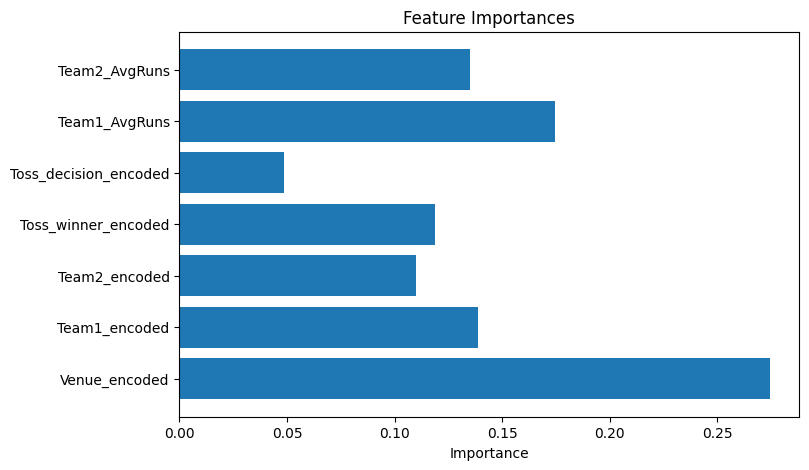

In [6]:
import matplotlib.pyplot as plt
# Extract feature importance scores from the model (assuming it supports this attribute)
importances = model.feature_importances_
# Getting the corresponding feature names from the dataset
feat_names = X.columns
# Creating a horizontal bar chart to display the relative importance of each feature
plt.figure(figsize=(8, 5))
plt.barh(feat_names, importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.show()
# This visualization will helps in identification of which features have the most influence
# on the model's predictions, guiding feature selection and interpretation.


In [ ]:
!pip install openpyxl

**Integrating The Visual Crosiing API to fetch the each venue wise particual Weather Data for particualar Date and time and storing those data's via merging with another dataset match_info.csv and whihch creates a new dataset named as match_data_with_weather.xlsx**

In [7]:
import pandas as pd
import requests
import time

#  Here it is my, Visual Crossing API key
API_KEY = '3DRBN4KGVY2B7EN3YD8CPFPM9'

# Mapping the venues name according to their located cities name. Beacuse, cities particualr name can cause the API to fetch the data for the desired location
venue_to_city = {
    "AMI Stadium": "Christchurch",
    "Adelaide Oval": "Adelaide",
    "Affies Park": "Windhoek",
    "Al Amerat Cricket Ground Oman Cricket (Ministry Turf 1)": "Al Amerat",
    "Al Amerat Cricket Ground Oman Cricket (Ministry Turf 2)": "Al Amerat",
    "Amini Park, Port Moresby": "Port Moresby",
    "Andhra Cricket Association-Visakhapatnam District Cricket Association Stadium": "Visakhapatnam",
    "Antigua Recreation Ground, St John's": "St John's",
    "Arbab Niaz Stadium": "Peshawar",
    "Arnos Vale Ground": "Kingstown",
    "Arnos Vale Ground, Kingstown": "Kingstown",
    "Arnos Vale Ground, Kingstown, St Vincent": "Kingstown",
    "Arun Jaitley Stadium": "Delhi",
    "Arun Jaitley Stadium, Delhi": "Delhi",
    "Bangabandhu National Stadium": "Dhaka",
    "Bangabandhu National Stadium, Dhaka": "Dhaka",
    "Barabati Stadium": "Cuttack",
    "Barabati Stadium, Cuttack": "Cuttack",
    "Barsapara Cricket Stadium": "Guwahati",
    "Barsapara Cricket Stadium, Guwahati": "Guwahati",
    "Basin Reserve": "Wellington",
    "Bay Oval": "Mount Maunganui",
    "Bay Oval, Mount Maunganui": "Mount Maunganui",
    "Beausejour Stadium, Gros Islet": "Gros Islet",
    "Bellerive Oval": "Hobart",
    "Bellerive Oval, Hobart": "Hobart",
    "Bert Sutcliffe Oval": "Lincoln",
    "Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium": "Lucknow",
    "Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow": "Lucknow",
    "Boland Bank Park, Paarl": "Paarl",
    "Boland Park": "Paarl",
    "Boland Park, Paarl": "Paarl",
    "Brabourne Stadium": "Mumbai",
    "Bready Cricket Club, Magheramason": "Magheramason",
    "Brian Lara Stadium, Tarouba, Trinidad": "Tarouba",
    "Brisbane Cricket Ground": "Brisbane",
    "Brisbane Cricket Ground, Woolloongabba": "Brisbane",
    "Brisbane Cricket Ground, Woolloongabba, Brisbane": "Brisbane",
    "Buffalo Park": "East London",
    "Buffalo Park, East London": "East London",
    "Bulawayo Athletic Club": "Bulawayo",
    "Bundaberg Rum Stadium, Cairns": "Cairns",
    "Cambusdoon New Ground": "Ayr",
    "Cambusdoon New Ground, Ayr": "Ayr",
    "Captain Roop Singh Stadium": "Gwalior",
    "Captain Roop Singh Stadium, Gwalior": "Gwalior",
    "Carisbrook": "Dunedin",
    "Castle Avenue": "Dublin",
    "Cazaly's Stadium, Cairns": "Cairns",
    "Central Broward Regional Park Stadium Turf Ground": "Lauderhill",
    "Chevrolet Park": "Bloemfontein",
    "Chittagong Divisional Stadium": "Chattogram",
    "Choice Moosa Stadium, Pearland": "Pearland",
    "City Oval, Pietermaritzburg": "Pietermaritzburg",
    "Civil Service Cricket Club, Stormont": "Belfast",
    "Civil Service Cricket Club, Stormont, Belfast": "Belfast",
    "Clontarf Cricket Club Ground": "Dublin",
    "Clontarf Cricket Club Ground, Dublin": "Dublin",
    "Cobham Oval (New)": "Whangarei",
    "County Ground": "Hove",
    "County Ground, Bristol": "Bristol",
    "County Ground, Chelmsford": "Chelmsford",
    "Daren Sammy National Cricket Stadium": "Gros Islet",
    "Daren Sammy National Cricket Stadium, Gros Islet": "Gros Islet",
    "Darren Sammy National Cricket Stadium, Gros Islet": "Gros Islet",
    "Darren Sammy National Cricket Stadium, St Lucia": "Gros Islet",
    "Davies Park, Queenstown": "Queenstown",
    "De Beers Diamond Oval": "Kimberley",
    "De Beers Diamond Oval, Kimberley": "Kimberley",
    "Diamond Oval": "Kimberley",
    "Diamond Oval, Kimberley": "Kimberley",
    "Docklands Stadium": "Melbourne",
    "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium": "Visakhapatnam",
    "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam": "Visakhapatnam",
    "Dubai International Cricket Stadium": "Dubai",
    "Dubai Sports City Cricket Stadium": "Dubai",
    "Eden Gardens": "Kolkata",
    "Eden Gardens, Kolkata": "Kolkata",
    "Eden Park": "Auckland",
    "Eden Park, Auckland": "Auckland",
    "Edgbaston": "Birmingham",
    "Edgbaston, Birmingham": "Birmingham",
    "Feroz Shah Kotla": "Delhi",
    "Gaddafi Stadium": "Lahore",
    "Gaddafi Stadium, Lahore": "Lahore",
    "Galle International Stadium": "Galle",
    "Goodyear Park": "Bloemfontein",
    "Goodyear Park, Bloemfontein": "Bloemfontein",
    "Grange Cricket Club Ground, Raeburn Place": "Edinburgh",
    "Grange Cricket Club Ground, Raeburn Place, Edinburgh": "Edinburgh",
    "Grange Cricket Club, Raeburn Place": "Edinburgh",
    "Greater Noida Sports Complex Ground": "Greater Noida",
    "Green Park": "Kanpur",
    "Greenfield International Stadium": "Thiruvananthapuram",
    "Greenfield International Stadium, Thiruvananthapuram": "Thiruvananthapuram",
    "Gymkhana Club Ground": "Nairobi",
    "Gymkhana Club Ground, Nairobi": "Nairobi",
    "Hagley Oval": "Christchurch",
    "Hagley Oval, Christchurch": "Christchurch",
    "Harare Sports Club": "Harare",
    "Hazelaarweg, Rotterdam": "Rotterdam",
    "Headingley": "Leeds",
    "Headingley, Leeds": "Leeds",
    "Himachal Pradesh Cricket Association Stadium": "Dharamshala",
    "Holkar Cricket Stadium": "Indore",
    "Holkar Cricket Stadium, Indore": "Indore",
    "ICC Academy": "Dubai",
    "ICC Academy, Dubai": "Dubai",
    "ICC Global Cricket Academy": "Dubai",
    "Indian Petrochemicals Corporation Limited Sports Complex Ground": "Vadodara",
    "Iqbal Stadium": "Faisalabad",
    "Iqbal Stadium, Faisalabad": "Faisalabad",
    "JSCA International Stadium Complex": "Ranchi",
    "JSCA International Stadium Complex, Ranchi": "Ranchi",
    "Jade Stadium": "Christchurch",
    "Jade Stadium, Christchurch": "Christchurch",
    "Jaffery Sports Club Ground": "Nairobi",
    "John Davies Oval": "Queenstown",
    "Keenan Stadium": "Jamshedpur",
    "Kennington Oval": "London",
    "Kennington Oval, London": "London",
    "Kensington Oval, Barbados": "Bridgetown",
    "Kensington Oval, Bridgetown": "Bridgetown",
    "Kensington Oval, Bridgetown, Barbados": "Bridgetown",
    "Khan Shaheb Osman Ali Stadium": "Fatullah",
    "Kingsmead": "Durban",
    "Kingsmead, Durban": "Durban",
    "Kinrara Academy Oval": "Kuala Lumpur",
    "Lal Bahadur Shastri Stadium, Hyderabad, Deccan": "Hyderabad",
    "Lord's": "London",
    "Lord's, London": "London",
    "M Chinnaswamy Stadium": "Bangalore",
    "M.Chinnaswamy Stadium": "Bangalore",
    "MA Aziz Stadium": "Chattogram",
    "MA Aziz Stadium, Chittagong": "Chattogram",
    "MA Chidambaram Stadium, Chepauk": "Chennai",
    "MA Chidambaram Stadium, Chepauk, Chennai": "Chennai",
    "Madhavrao Scindia Cricket Ground": "Rajkot",
    "Maharani Usharaje Trust Cricket Ground": "Indore",
    "Maharashtra Cricket Association Stadium": "Pune",
    "Mahinda Rajapaksa International Cricket Stadium, Sooriyawewa": "Hambantota",
    "Mahinda Rajapaksa International Cricket Stadium, Sooriyawewa, Hambantota": "Hambantota",
    "Malahide": "Dublin",
    "Mangaung Oval": "Bloemfontein",
    "Mangaung Oval, Bloemfontein": "Bloemfontein",
    "Mannofield Park": "Aberdeen",
    "Mannofield Park, Aberdeen": "Aberdeen",
    "Manuka Oval": "Canberra",
    "Maple Leaf North-West Ground": "King City",
    "Marrara Cricket Ground": "Darwin",
    "Marrara Cricket Ground, Darwin": "Darwin",
    "McLean Park": "Napier",
    "McLean Park, Napier": "Napier",
    "ICC Academy": "Dubai, UAE",
    "ICC Academy, Dubai": "Dubai, UAE",
    "ICC Global Cricket Academy": "Dubai, UAE",
    "Indian Petrochemicals Corporation Limited Sports Complex Ground": "Vadodara, India",
    "Iqbal Stadium": "Faisalabad, Pakistan",
    "Iqbal Stadium, Faisalabad": "Faisalabad, Pakistan",
    "JSCA International Stadium Complex": "Ranchi, India",
    "JSCA International Stadium Complex, Ranchi": "Ranchi, India",
    "Jade Stadium": "Christchurch, New Zealand",
    "Jade Stadium, Christchurch": "Christchurch, New Zealand",
    "Jaffery Sports Club Ground": "Nairobi, Kenya",
    "John Davies Oval": "Queenstown, New Zealand",
    "Keenan Stadium": "Jamshedpur, India",
    "Kennington Oval": "London, England",
    "Kennington Oval, London": "London, England",
    "Kensington Oval, Barbados": "Bridgetown, Barbados",
    "Kensington Oval, Bridgetown": "Bridgetown, Barbados",
    "Kensington Oval, Bridgetown, Barbados": "Bridgetown, Barbados",
    "Khan Shaheb Osman Ali Stadium": "Fatullah, Bangladesh",
    "Kingsmead": "Durban, South Africa",
    "Kingsmead, Durban": "Durban, South Africa",
    "Kinrara Academy Oval": "Kuala Lumpur, Malaysia",
    "Lal Bahadur Shastri Stadium, Hyderabad, Deccan": "Hyderabad, India",
    "Lord's": "London, England",
    "Lord's, London": "London, England",
    "M Chinnaswamy Stadium": "Bengaluru, India",
    "M.Chinnaswamy Stadium": "Bengaluru, India",
    "MA Aziz Stadium": "Chittagong, Bangladesh",
    "MA Aziz Stadium, Chittagong": "Chittagong, Bangladesh",
    "MA Chidambaram Stadium, Chepauk": "Chennai, India",
    "MA Chidambaram Stadium, Chepauk, Chennai": "Chennai, India",
    "Madhavrao Scindia Cricket Ground": "Rajkot, India",
    "Maharani Usharaje Trust Cricket Ground": "Indore, India",
    "Maharashtra Cricket Association Stadium": "Pune, India",
    "Mahinda Rajapaksa International Cricket Stadium, Sooriyawewa": "Hambantota, Sri Lanka",
    "Mahinda Rajapaksa International Cricket Stadium, Sooriyawewa, Hambantota": "Hambantota, Sri Lanka",
    "Malahide": "Dublin, Ireland",
    "Mangaung Oval": "Bloemfontein, South Africa",
    "Mangaung Oval, Bloemfontein": "Bloemfontein, South Africa",
    "Mannofield Park": "Aberdeen, Scotland",
    "Mannofield Park, Aberdeen": "Aberdeen, Scotland",
    "Manuka Oval": "Canberra, Australia",
    "Maple Leaf North-West Ground": "Toronto, Canada",
    "Marrara Cricket Ground": "Darwin, Australia",
    "Marrara Cricket Ground, Darwin": "Darwin, Australia",
    "McLean Park": "Napier, New Zealand",
    "McLean Park, Napier": "Napier, New Zealand",
    "Melbourne Cricket Ground": "Melbourne, Australia",
    "Mission Road Ground, Mong Kok": "Hong Kong",
    "Mombasa Sports Club Ground": "Mombasa, Kenya",
    "Moosa Cricket Stadium, Pearland": "Pearland, USA",
    "Mulpani Cricket Ground": "Kathmandu, Nepal",
    "Multan Cricket Stadium": "Multan, Pakistan",
    "Nahar Singh Stadium": "Faridabad, India",
    "Nahar Singh Stadium, Faridabad": "Faridabad, India",
    "Narayanganj Osmani Stadium": "Narayanganj, Bangladesh",
    "Narendra Modi Stadium, Ahmedabad": "Ahmedabad, India",
    "National Cricket Stadium": "St George's, Grenada",
    "National Cricket Stadium, Grenada": "St George's, Grenada",
    "National Cricket Stadium, St George's": "St George's, Grenada",
    "National Stadium": "Karachi, Pakistan",
    "National Stadium, Karachi": "Karachi, Pakistan",
    "Nehru Stadium": "Indore, India",
    "Nehru Stadium, Fatorda": "Margao, India",
    "Nehru Stadium, Poona": "Pune, India",
    "New Wanderers Stadium": "Johannesburg, South Africa",
    "New Wanderers Stadium, Johannesburg": "Johannesburg, South Africa",
    "Newlands": "Cape Town, South Africa",
    "Newlands, Cape Town": "Cape Town, South Africa",
    "Niaz Stadium, Hyderabad": "Hyderabad, Pakistan",
    "North West Cricket Stadium, Potchefstroom": "Potchefstroom, South Africa"


}



# Function to clean venue into a city
def clean_location(venue):
    if not isinstance(venue, str):
        return "Unknown"
    for keyword in venue_to_city:
        if keyword.lower() in venue.lower():
            return venue_to_city[keyword]
    return venue.split(",")[0].strip().split()[0]  # fallback

# Function to get weather data from API
def get_weather_data(date, location):
    url = f'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{location}/{date}?unitGroup=metric&key={API_KEY}&include=days'
    try:
        response = requests.get(url)
        if response.status_code == 200:
            day = response.json()['days'][0]
            return pd.Series({
                'Temperature': day.get('temp'),
                'Humidity': day.get('humidity'),
                'Conditions': day.get('conditions'),
                'Precipitation': day.get('precip')
            })
        else:
            print(f"API error: {response.status_code} for {location} on {date}")
    except Exception as e:
       print(f"Exception for {location} on {date}: {e}")

    return pd.Series({
        'Temperature': None,
        'Humidity': None,
        'Conditions': None,
        'Precipitation': None
    })

# Fetch weather for each match
weather_data = []
for idx, row in match_df.iterrows():
    try:
        date = pd.to_datetime(row['Date']).strftime('%Y-%m-%d')
        location = clean_location(row['Venue'])
        print(f"Fetching weather for {location} on {date}...")

        weather_info = get_weather_data(date, location)
        print(f"Weather: {weather_info.to_dict()}")
        weather_data.append(weather_info)

        time.sleep(1.1)  # API rate limit means in 1.1 seconds it can fetch a particular rows location wise weather Data

    except Exception as e:
        print(f"Error at row {idx}: {e}")
        weather_data.append(pd.Series({
            'Temperature': None,
            'Humidity': None,
            'Conditions': None,
            'Precipitation': None
        }))

# Merge and save
weather_df = pd.DataFrame(weather_data)
match_df = match_df.reset_index(drop=True)
final_df = pd.concat([match_df, weather_df], axis=1)

# Save to Excel
final_df.to_excel('/content/drive/MyDrive/SMC_Labs/match_data_with_weather.xlsx', index=False)
print("File saved as match_data_with_weather.xlsx")

Streaming output truncated to the last 5000 lines.
Weather: {'Temperature': 25.3, 'Humidity': 48.5, 'Conditions': 'Partially cloudy', 'Precipitation': 0.0}
Fetching weather for London, England on 2022-07-14...
Weather: {'Temperature': 20.5, 'Humidity': 53.7, 'Conditions': 'Partially cloudy', 'Precipitation': 0.0}
Fetching weather for Old on 2022-07-17...
API error: 400 for Old on 2022-07-17
Weather: {'Temperature': None, 'Humidity': None, 'Conditions': None, 'Precipitation': None}
Fetching weather for Riverside on 2022-07-19...
Weather: {'Temperature': 28.3, 'Humidity': 37.2, 'Conditions': 'Clear', 'Precipitation': 0.0}
Fetching weather for Old on 2022-07-22...
API error: 400 for Old on 2022-07-22
Weather: {'Temperature': None, 'Humidity': None, 'Conditions': None, 'Precipitation': None}
Fetching weather for Leeds on 2022-07-24...
Weather: {'Temperature': 18.3, 'Humidity': 83.9, 'Conditions': 'Rain, Partially cloudy', 'Precipitation': 5.69}
Fetching weather for SuperSport on 2021-11-26

**After, Integrating Weather Data's Through calling an Weather API Visual Crossing.**
**Now we will again use Different ML models to train and test our model performance being integration of weather Data's**

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/SMC_Labs/match_data_with_weather.csv"
match_df = pd.read_csv(file_path)

# Keeping only the first 1141 rows beacuse of after that API cannnot provided me any more datas for weather in a free of Costs
match_df = match_df.iloc[:1141]

# Keep only the required columns
columns_to_keep = [
    'Team _1', 'Team 2', 'Toss Winner', 'Toss Decision',
    'Conditions', 'Winner', 'Temperature', 'Humidity', 'Precipitation'
]
match_df = match_df[columns_to_keep]

# Fill missing values
# Numeric columns are filled with mean
for col in ['Temperature', 'Humidity', 'Precipitation']:
    match_df[col] = match_df[col].fillna(match_df[col].mean())

# Categorical columns are filled with mode
for col in ['Team _1', 'Team 2', 'Toss Winner', 'Toss Decision', 'Conditions', 'Winner']:
    match_df[col] = match_df[col].fillna(match_df[col].mode()[0])
#for dropping any null values if exists
match_df = match_df.dropna(subset=['Winner'])


In [ ]:
print("Any NaNs left?", match_df.isna().sum())

Any NaNs left? Team _1          0
Team 2           0
Toss Winner      0
Toss Decision    0
Conditions       0
Winner           0
Temperature      0
Humidity         0
Precipitation    0
dtype: int64


In [ ]:
# Import necessary libraries for data manipulation, splitting, scaling, and modeling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

# Define explicit mappings for categorical variables to convert team names, toss decisions,
# and weather conditions into numeric codes. This is crucial for machine learning models
# that require numeric inputs.
team_mapping = {
    'Afghanistan': 1, 'Africa XI': 2, 'Australia': 3, 'Bangladesh': 4,
    'Bermuda': 5, 'Canada': 6, 'England': 7, 'Hong Kong': 8, 'India': 9,
    'Ireland': 10, 'Jersey': 11, 'Kenya': 12, 'Namibia': 13, 'Nepal': 14,
    'Netherlands': 15, 'Oman': 16, 'Pakistan': 17, 'Papua New Guinea': 18,
    'Scotland': 19, 'South Africa': 20, 'Sri Lanka': 21,
    'United Arab Emirates': 22, 'United States of America': 23,
    'West Indies': 24, 'Zimbabwe': 25
}

# These mappings ensure consistent and reproducible encoding of categorical features,
# avoiding issues like mismatched or missing values during model training and prediction.
decision_mapping = {'bat': 1, 'field': 2, 'tertiary': 3, 'unknown': 4}
condition_mapping = {'Clear': 1, 'Overcast': 2, 'Partially cloudy': 3, 'Rain': 4, 'Snow': 5}

# Applying the mappings to corresponding columns in the dataframe to transform
# string categories into their numeric representations, enabling effective model processing.
match_df['Team _1'] = match_df['Team _1'].map(team_mapping)
match_df['Team 2'] = match_df['Team 2'].map(team_mapping)
match_df['Toss Winner'] = match_df['Toss Winner'].map(team_mapping)
match_df['Winner'] = match_df['Winner'].map(team_mapping)
match_df['Toss Decision'] = match_df['Toss Decision'].map(decision_mapping)
match_df['Conditions'] = match_df['Conditions'].map(condition_mapping)

In [ ]:
print("Any NaNs left?", match_df.isna().sum())

Any NaNs left? Team _1           76
Team 2            85
Toss Winner       89
Toss Decision      0
Conditions       380
Winner           145
Temperature        0
Humidity           0
Precipitation      0
dtype: int64


In [ ]:
match_df = match_df.dropna()

In [ ]:
print("Any NaNs left?", match_df.isna().sum())

Any NaNs left? Team _1          0
Team 2           0
Toss Winner      0
Toss Decision    0
Conditions       0
Winner           0
Temperature      0
Humidity         0
Precipitation    0
dtype: int64


In [ ]:
#Defining features and target
X = match_df.drop(columns=['Winner'])
y = match_df['Winner']  # Keep this unscaled

#Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3217)


In [ ]:
#Scalling by only the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Training the Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

print("Naïve Bayes model has been trained successfully.")

Naïve Bayes model has been trained successfully.


**HeatMap**

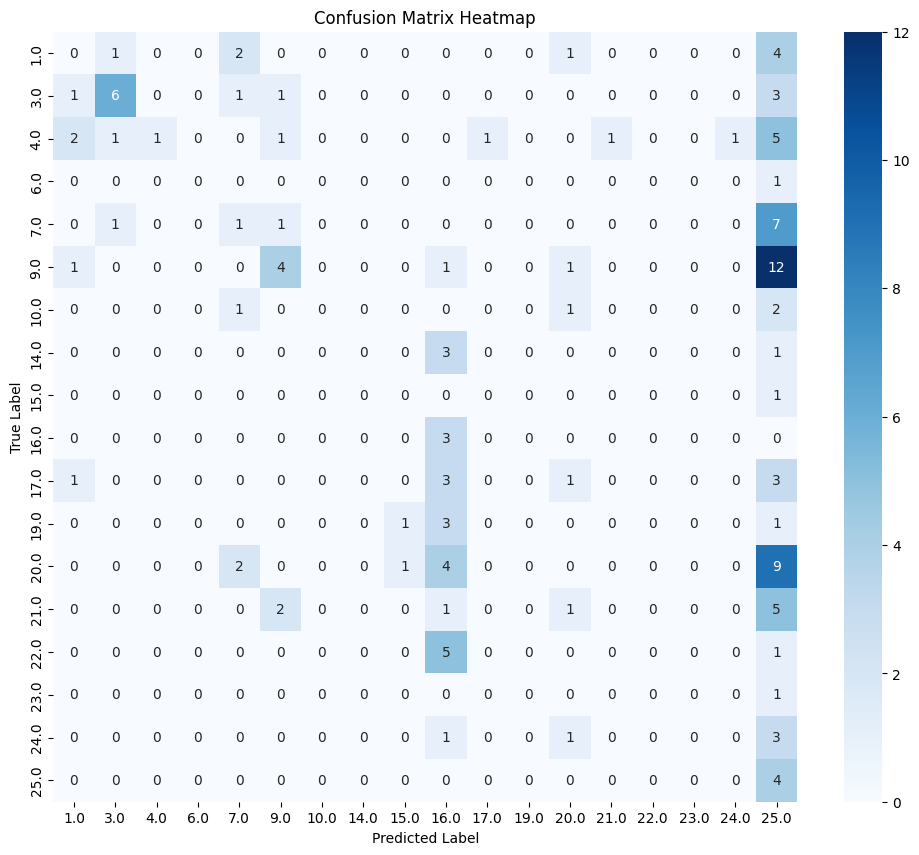

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred = nb_classifier.predict(X_test)

# Computing the  confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Getting the  class labels being sorted
class_labels = sorted(list(set(y_test)))

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


**Evaluating Model Performance: Training vs. Testing Accuracy for Naive Bayes Model**

In [ ]:
# Calculating and printting accuracy scores to evaluate model performance

# Train accuracy measures how well the model fits the training data
train_accuracy = accuracy_score(y_train, nb_classifier.predict(X_train))

# Test accuracy measures how well the model generalizes to unseen data
test_accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.1650485436893204
Test Accuracy: 0.20155038759689922


**Implementing LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Initializing Logistic Regression model
logreg_model = LogisticRegression(max_iter=2000)  # Here, It need to be increase max_iter if convergence warning are showned

#Training the model
logreg_model.fit(X_train, y_train)

#Predicting on the test set
y_pred = logreg_model.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Model Accuracy: 0.20155038759689922

Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         8
         3.0       0.29      0.17      0.21        12
         4.0       0.00      0.00      0.00        13
         6.0       0.00      0.00      0.00         1
         7.0       0.18      0.40      0.25        10
         9.0       0.25      0.84      0.39        19
        10.0       0.00      0.00      0.00         4
        14.0       0.00      0.00      0.00         4
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         3
        17.0       0.17      0.12      0.14         8
        19.0       0.00      0.00      0.00         5
        20.0       0.14      0.06      0.09        16
        21.0       0.00      0.00      0.00         9
        22.0       0.00      0.00      0.00         6
        23.0       0.00      0.00      0.00         1


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Implementing DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#Initializing the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=3217)

#Training the model
dt_classifier.fit(X_train, y_train)

#Predicting on the test set
y_pred = dt_classifier.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree Model Accuracy: 0.5348837209302325

Classification Report:
               precision    recall  f1-score   support

         1.0       0.33      0.12      0.18         8
         3.0       0.60      0.25      0.35        12
         4.0       0.73      0.85      0.79        13
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         1
         7.0       0.42      0.50      0.45        10
         8.0       0.00      0.00      0.00         0
         9.0       0.70      0.84      0.76        19
        10.0       0.20      0.25      0.22         4
        13.0       0.00      0.00      0.00         0
        14.0       1.00      0.50      0.67         4
        15.0       0.00      0.00      0.00         1
        16.0       0.33      0.33      0.33         3
        17.0       0.62      0.62      0.62         8
        18.0       0.00      0.00      0.00         0
        19.0       0.75      0.60      0.67         5
       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

**Implementing KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

#Initializing the KNN model (you can tune n_neighbors)
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Default is 5

#Training the model
knn_classifier.fit(X_train, y_train)

#Predicting on the test set
y_pred = knn_classifier.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("KNN Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


KNN Model Accuracy: 0.24806201550387597

Classification Report:
               precision    recall  f1-score   support

         1.0       0.25      0.25      0.25         8
         3.0       0.00      0.00      0.00        12
         4.0       0.12      0.15      0.14        13
         6.0       0.00      0.00      0.00         1
         7.0       0.26      0.60      0.36        10
         9.0       0.38      0.58      0.46        19
        10.0       0.00      0.00      0.00         4
        13.0       0.00      0.00      0.00         0
        14.0       0.33      0.50      0.40         4
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         3
        17.0       0.10      0.12      0.11         8
        19.0       0.00      0.00      0.00         5
        20.0       0.40      0.25      0.31        16
        21.0       0.25      0.11      0.15         9
        22.0       1.00      0.17      0.29         6
        23.0    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

#Scalling the features ( which is very important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the SVM model (by using kernel='rbf')
svm_classifier = SVC(kernel='rbf', random_state=3217)

#Trainng the model
svm_classifier.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("SVM Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


SVM Model Accuracy: 0.26356589147286824

Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         8
         3.0       0.55      0.50      0.52        12
         4.0       0.33      0.08      0.12        13
         6.0       0.00      0.00      0.00         1
         7.0       0.12      0.30      0.17        10
         9.0       0.29      0.74      0.41        19
        10.0       0.00      0.00      0.00         4
        14.0       0.50      0.50      0.50         4
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         3
        17.0       0.29      0.25      0.27         8
        19.0       0.00      0.00      0.00         5
        20.0       0.22      0.25      0.24        16
        21.0       0.17      0.11      0.13         9
        22.0       0.00      0.00      0.00         6
        23.0       0.00      0.00      0.00         1
        24.0    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Fit on training target and transform both for the train and test labels
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train_encoded)

# Predict
y_pred_encoded = xgb_classifier.predict(X_test)

# Decode predictions back to original labels
y_pred = le.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print("XGBoost Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_encoded))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.627906976744186

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.62      0.42      0.50        12
           2       0.73      0.62      0.67        13
           4       0.00      0.00      0.00         1
           5       0.57      0.80      0.67        10
           7       0.68      0.79      0.73        19
           8       0.25      0.25      0.25         4
          10       0.00      0.00      0.00         0
          11       1.00      0.50      0.67         4
          12       0.50      1.00      0.67         1
          13       0.25      0.33      0.29         3
          14       0.78      0.88      0.82         8
          15       0.00      0.00      0.00         0
          16       0.60      0.60      0.60         5
          17       0.78      0.88      0.82        16
          18       0.75      0.33      0.46         9
          19  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_